In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('../input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv')

In [26]:
df.rename(columns={'T_STANDARD_TICKET_TYPE_NAME':'TICKET_TYPE','SEAT_REGION_NAME':'SEAT_TYPE'},inplace=True)

In [27]:
female=df.groupby(['SEX']).get_group('female') #女
#print(sex_member)
female_member=female.groupby(['TICKET_TYPE']).get_group('member') #女會員
#print(type(female_member))
female_non_member=female.groupby(['TICKET_TYPE']).get_group('non-member')#女非會員
male=df.groupby(['SEX']).get_group('male') #男
#print(sex_member)
male_member=male.groupby(['TICKET_TYPE']).get_group('member') #男會員
male_non_member=male.groupby(['TICKET_TYPE']).get_group('non-member')   #男非會員
#print(type(male_member)) #都是dataframe

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
3785
455
<class 'pandas.core.frame.DataFrame'>
2522
307


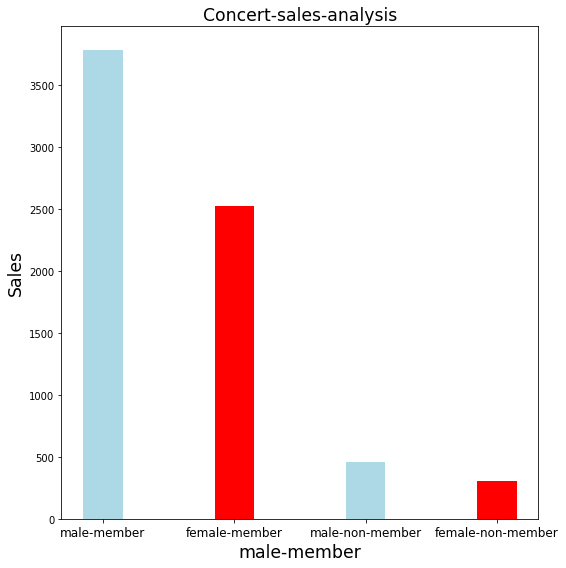

In [28]:
# bar chart,有男生與女生數量了
import matplotlib.pyplot as plt
# 男生數量
print(type(male_member))
print(len(male_member)) # 男會員數量
print(len(male_non_member)) # 男非會員數量
# 女生數量
print(type(female_member))
print(len(female_member)) # 女會員數量
print(len(female_non_member)) #女非會員數量
member_or_not=['male-member','female-member','male-non-member','female-non-member']
list_all=[len(male_member),len(female_member),len(male_non_member),len(female_non_member)]
color=['lightblue','red','lightblue','red']
x = np.arange(len(member_or_not))
plt.figure(figsize=(8.0,8.0))
plt.bar(x,list_all,width=0.3,align='center',color=color)
plt.title('Concert-sales-analysis',fontsize='xx-large')
plt.xlabel('male-member',fontsize='xx-large')
plt.xticks(x,member_or_not,fontsize='large')
plt.ylabel('Sales',fontsize='xx-large')
#plt.legend(['male-member','female-member'],loc='upper right',fontsize='large')
plt.tight_layout()

In [29]:
lbar = []
for i in df.groupby(['SEAT_TYPE','SEX','TICKET_TYPE'],  group_keys=False):
    #print(i[0][0],'/',i[0][1],'/',i[0][2],': ',len(i[1]))
    if (i[0][0] == 'Floor3Sectionyellow3E' and
            i[0][1] == 'female' and
            i[0][2] == 'member'):
        lbar.append(len(i[1]))
        lbar.append(0)
        #print('Floor3Sectionyellow3E / female / non-member: 0')
        continue
    lbar.append(len(i[1]))
#print(lbar)

female_member_list=[]
for index in range(0,108,4):
    female_member_list.append(lbar[index])
print("female_member_list:")
print(female_member_list)
print('-'*40)
female_non_member_list=[]
for index in range(1,108,4):
    female_non_member_list.append(lbar[index])
print("female_non_member_list:")
print(female_non_member_list)
print('-'*40)
male_member_list=[]
for index in range(2,108,4):
    male_member_list.append(lbar[index])
print("male_member_list:")
print(male_member_list)
print('-'*40)
male_non_member_list=[]
for index in range(3,108,4):
    male_non_member_list.append(lbar[index])
print("male_non_member_list:")
print(male_non_member_list)

#make sure the shape are the same
#print(len(female_member_list))
#print('-'*40)
#print(len(female_non_member_list))
#print('-'*40)
#print(len(male_member_list))
#print('-'*40)
#print(len(male_non_member_list))

female_member_list:
[71, 73, 68, 96, 45, 86, 55, 90, 63, 77, 62, 87, 79, 11, 50, 224, 243, 69, 110, 208, 193, 57, 14, 97, 98, 103, 93]
----------------------------------------
female_non_member_list:
[6, 10, 7, 12, 5, 4, 8, 23, 5, 6, 5, 12, 8, 3, 38, 8, 6, 0, 2, 38, 20, 21, 1, 25, 18, 10, 6]
----------------------------------------
male_member_list:
[60, 120, 74, 144, 63, 127, 71, 152, 108, 103, 61, 124, 152, 21, 68, 251, 202, 120, 99, 246, 247, 78, 25, 325, 230, 270, 244]
----------------------------------------
male_non_member_list:
[5, 10, 5, 18, 24, 6, 16, 32, 8, 13, 12, 2, 8, 4, 31, 10, 8, 1, 1, 22, 26, 35, 8, 63, 58, 19, 10]


In [30]:
#Get the regions 
#xticks_regions=df.groupby('SEAT_TYPE',  group_keys=False).apply(lambda x:x)['SEAT_TYPE'].unique()
xticks_regions=df['SEAT_TYPE'].unique()

<BarContainer object of 27 artists>

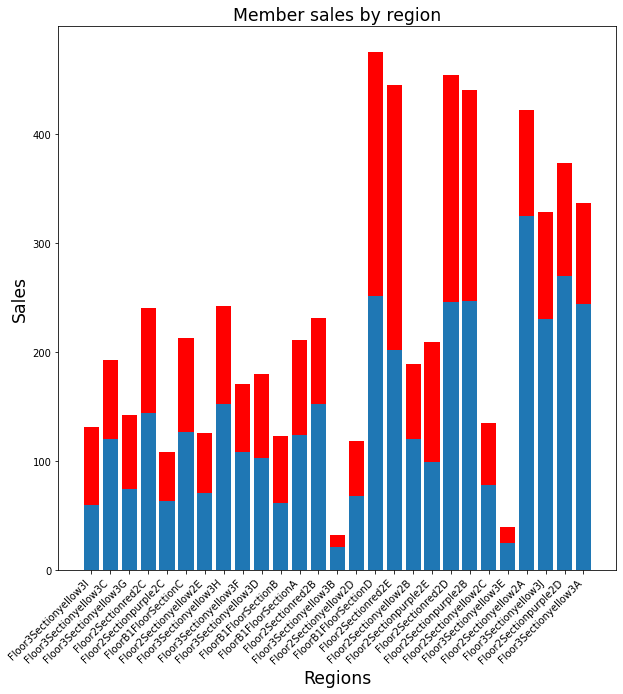

In [31]:
#Stacked bar chart
#member_list
plt.figure(figsize=(10.0,10.0))
plt.title('Member sales by region',fontsize='xx-large')
plt.xlabel('Regions',fontsize='xx-large')
plt.ylabel('Sales',fontsize='xx-large')
x=np.arange(len(female_member_list))
#print(x)
plt.xticks(x,xticks_regions,rotation=45,ha='right')
plt.bar(x,male_member_list)
plt.bar(x,female_member_list,bottom=male_member_list,color='red')

<BarContainer object of 27 artists>

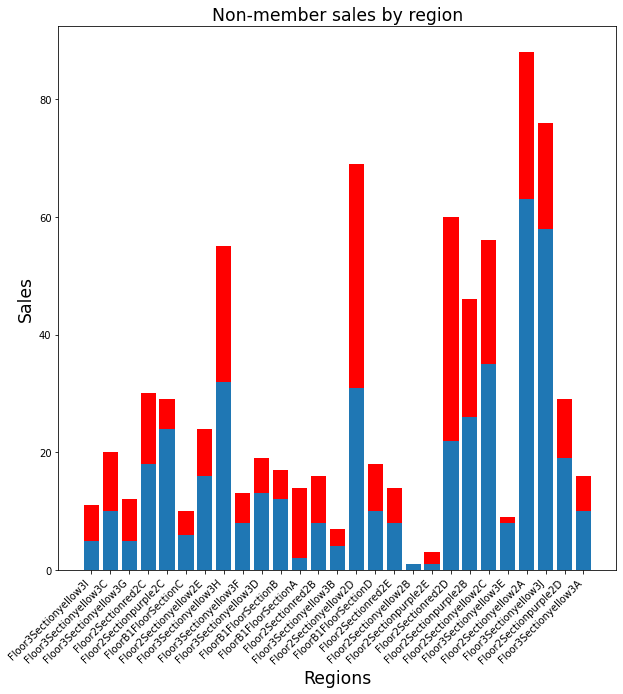

In [32]:
#Stacked bar chart
#non_member_list
#Use the horizontalalignment or ha argument for that and set it to "right":
plt.figure(figsize=(10.0,10.0))
plt.title('Non-member sales by region',fontsize='xx-large')
plt.xlabel('Regions',fontsize='xx-large')
plt.ylabel('Sales',fontsize='xx-large')

x=np.arange(len(female_member_list))
#print(x)
plt.xticks(x,xticks_regions,rotation=45,ha='right')
plt.bar(x,male_non_member_list)
plt.bar(x,female_non_member_list,bottom=male_non_member_list,color='red')